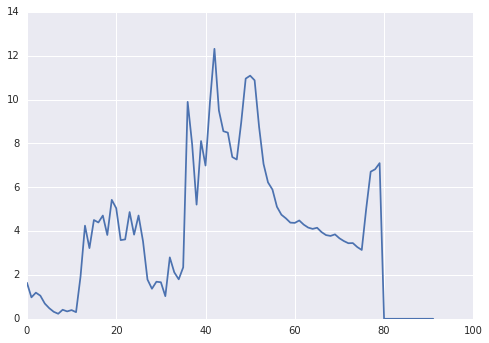

In [1]:
#Dataset read/plot
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('mlp.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [4]:
%bash
pip install keras

  Running setup.py bdist_wheel for keras: started
  Running setup.py bdist_wheel for keras: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/be/da/07/f1f583eb4ee0fba7b79afe86ba7495792ef60a63bfc6870c90
  Running setup.py bdist_wheel for theano: started
  Running setup.py bdist_wheel for theano: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/96/2b/3d/71d54e24a7171a4afb7144d1e944a7be643b448b23a35b9937
Successfully built keras theano


In [2]:
# other required packages
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# load the dataset
dataframe = pandas.read_csv('mlp.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [70]:

#dataset2 = pandas.read_csv('val.csv')
#dataset2 = dataset2.astype('float32')
#testX.as_matrix()

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.87)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [5]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# create and fit MLP model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 8.5257
Epoch 2/200
0s - loss: 5.1775
Epoch 3/200
0s - loss: 3.1841
Epoch 4/200
0s - loss: 2.3359
Epoch 5/200
0s - loss: 1.9988
Epoch 6/200
0s - loss: 1.9127
Epoch 7/200
0s - loss: 1.8823
Epoch 8/200
0s - loss: 1.8859
Epoch 9/200
0s - loss: 1.8820
Epoch 10/200
0s - loss: 1.8878
Epoch 11/200
0s - loss: 1.8899
Epoch 12/200
0s - loss: 1.8782
Epoch 13/200
0s - loss: 1.8908
Epoch 14/200
0s - loss: 1.8906
Epoch 15/200
0s - loss: 1.8742
Epoch 16/200
0s - loss: 1.8768
Epoch 17/200
0s - loss: 1.8749
Epoch 18/200
0s - loss: 1.8881
Epoch 19/200
0s - loss: 1.8792
Epoch 20/200
0s - loss: 1.9027
Epoch 21/200
0s - loss: 1.8648
Epoch 22/200
0s - loss: 1.8818
Epoch 23/200
0s - loss: 1.9154
Epoch 24/200
0s - loss: 1.8918
Epoch 25/200
0s - loss: 1.8944
Epoch 26/200
0s - loss: 1.8890
Epoch 27/200
0s - loss: 1.8934
Epoch 28/200
0s - loss: 1.8747
Epoch 29/200
0s - loss: 1.8738
Epoch 30/200
0s - loss: 1.8958
Epoch 31/200
0s - loss: 1.9071
Epoch 32/200
0s - loss: 1.8806
Epoch 33/200
0s -

In [8]:
# Estimate model performance
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1.85 MSE (1.36 RMSE)
Test Score: 0.24 MSE (0.49 RMSE)


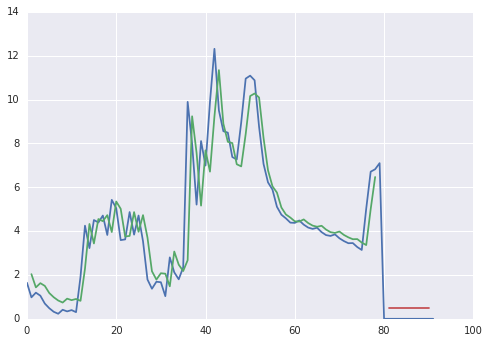

In [9]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
testPredict

array([[ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962],
       [ 0.4860962]], dtype=float32)